In [1]:
import pandas as pd
from polygon import RESTClient
from polygon_keys import polygon_key
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
from stock_methods import get_data_with_labels


In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['font.family'] = 'serif'

In [3]:
def get_news(symbol):
    key = polygon_key
    client = RESTClient(key)
    query = True
    from_date = "2012-01-01"
    to_date = (datetime.today().date() + timedelta(days = 1)).strftime("%Y-%m-%d")
    now_date = datetime.today().date().strftime("%Y-%m-%d")
    data_for_df = []
    while query:
        print(from_date, now_date)
        resp = client.reference_ticker_news_v2(ticker=symbol, order='ascending', sort='published_utc', gte=from_date, limit=1000)
        if 'results' in dir(resp):
            results = resp.results
            data_for_df = data_for_df + results[:-1]
            date = datetime.strptime(resp.results[-1]['published_utc'], "%Y-%m-%dT%H:%M:%SZ")
            from_date = date.date().strftime("%Y-%m-%d")
            print(from_date == now_date)
            if from_date == now_date:
                query = False 
        else:
            query = False 

    
    handledData = pd.DataFrame(data=data_for_df)
    handledData.drop('author', axis=1, inplace=True)
    handledData.drop('article_url', axis=1, inplace=True)
    handledData.drop('image_url', axis=1, inplace=True)
    handledData.drop('amp_url', axis=1, inplace=True)
    handledData.drop('id', axis=1, inplace=True)
    handledData.drop('publisher', axis=1, inplace=True)
    handledData.drop('tickers', axis=1, inplace=True)
#     handledData.index = pd.to_datetime(handledData['published_utc'].values).to_pydatetime()
    date = handledData['published_utc']
    handledData.drop('published_utc', axis=1, inplace=True)
    list_date = []
    for i in date:
        list_date = list_date + [datetime.strptime(i, '%Y-%m-%dT%H:%M:%SZ').date().strftime("%Y-%m-%d")]
    handledData['date'] = list_date
    handledData['date'].astype("category")
    handledData.dropna(inplace=True)
    return handledData

In [4]:
data = get_news('AAPL')

2012-01-01 2021-06-20
True


In [5]:
data

,title,description,keywords,date
0,"Invest Like Warren Buffett, Not Carl Icahn",Warren Buffett and Carl Icahn are two of the m...,[investing],2017-04-10
1,Stock Market Power Rankings,"They're big, beautiful, and ranked from 1 to 50.",[investing],2018-11-05
2,Stock Market Power Rankings: Last Call for Fac...,"They're big, beautiful, and ranked from 1 to 50.",[investing],2018-11-12
3,Stock Market Power Rankings: Apple's $190 Bill...,"They're big, beautiful, and ranked from 1 to 50.",[investing],2018-11-18
4,"Stock Market Power Rankings: Save Us, Amazon","They're big, beautiful, and ranked from 1 to 50.",[investing],2018-11-25
...,...,...,...,...
898,This Apple Supplier Is Generating Bigger Gains...,Jabil is impressing the market with its resili...,[investing],2021-06-19
899,NVIDIA: The Next Trillion Dollar Company?,NVIDIA could become the biggest company in the...,[investing],2021-06-19
902,3 Stocks I'll Be Buying When The Market Crashe...,Buying these great companies during a big corr...,[investing],2021-06-20
903,This Is Warren Buffett's Best Dividend Stock b...,There's a lot to like with this Buffett stock.,[investing],2021-06-20


2012-01-01
2012-04-19
2012-08-09
2012-11-29
2013-03-19
2013-07-18
2013-11-06
2014-03-12
2014-07-15
2014-10-22
2015-02-06
2015-05-19
2015-08-28
2015-12-14
2016-04-07
2016-08-03
2016-12-02
2017-04-12
2017-08-14
2017-12-07
2018-03-29
2018-07-26
2018-11-07
2019-02-25
2019-06-14
2019-10-03
2020-01-21
2020-04-20
2020-07-28
2020-10-17
2021-01-12
2021-04-06
2021-06-19


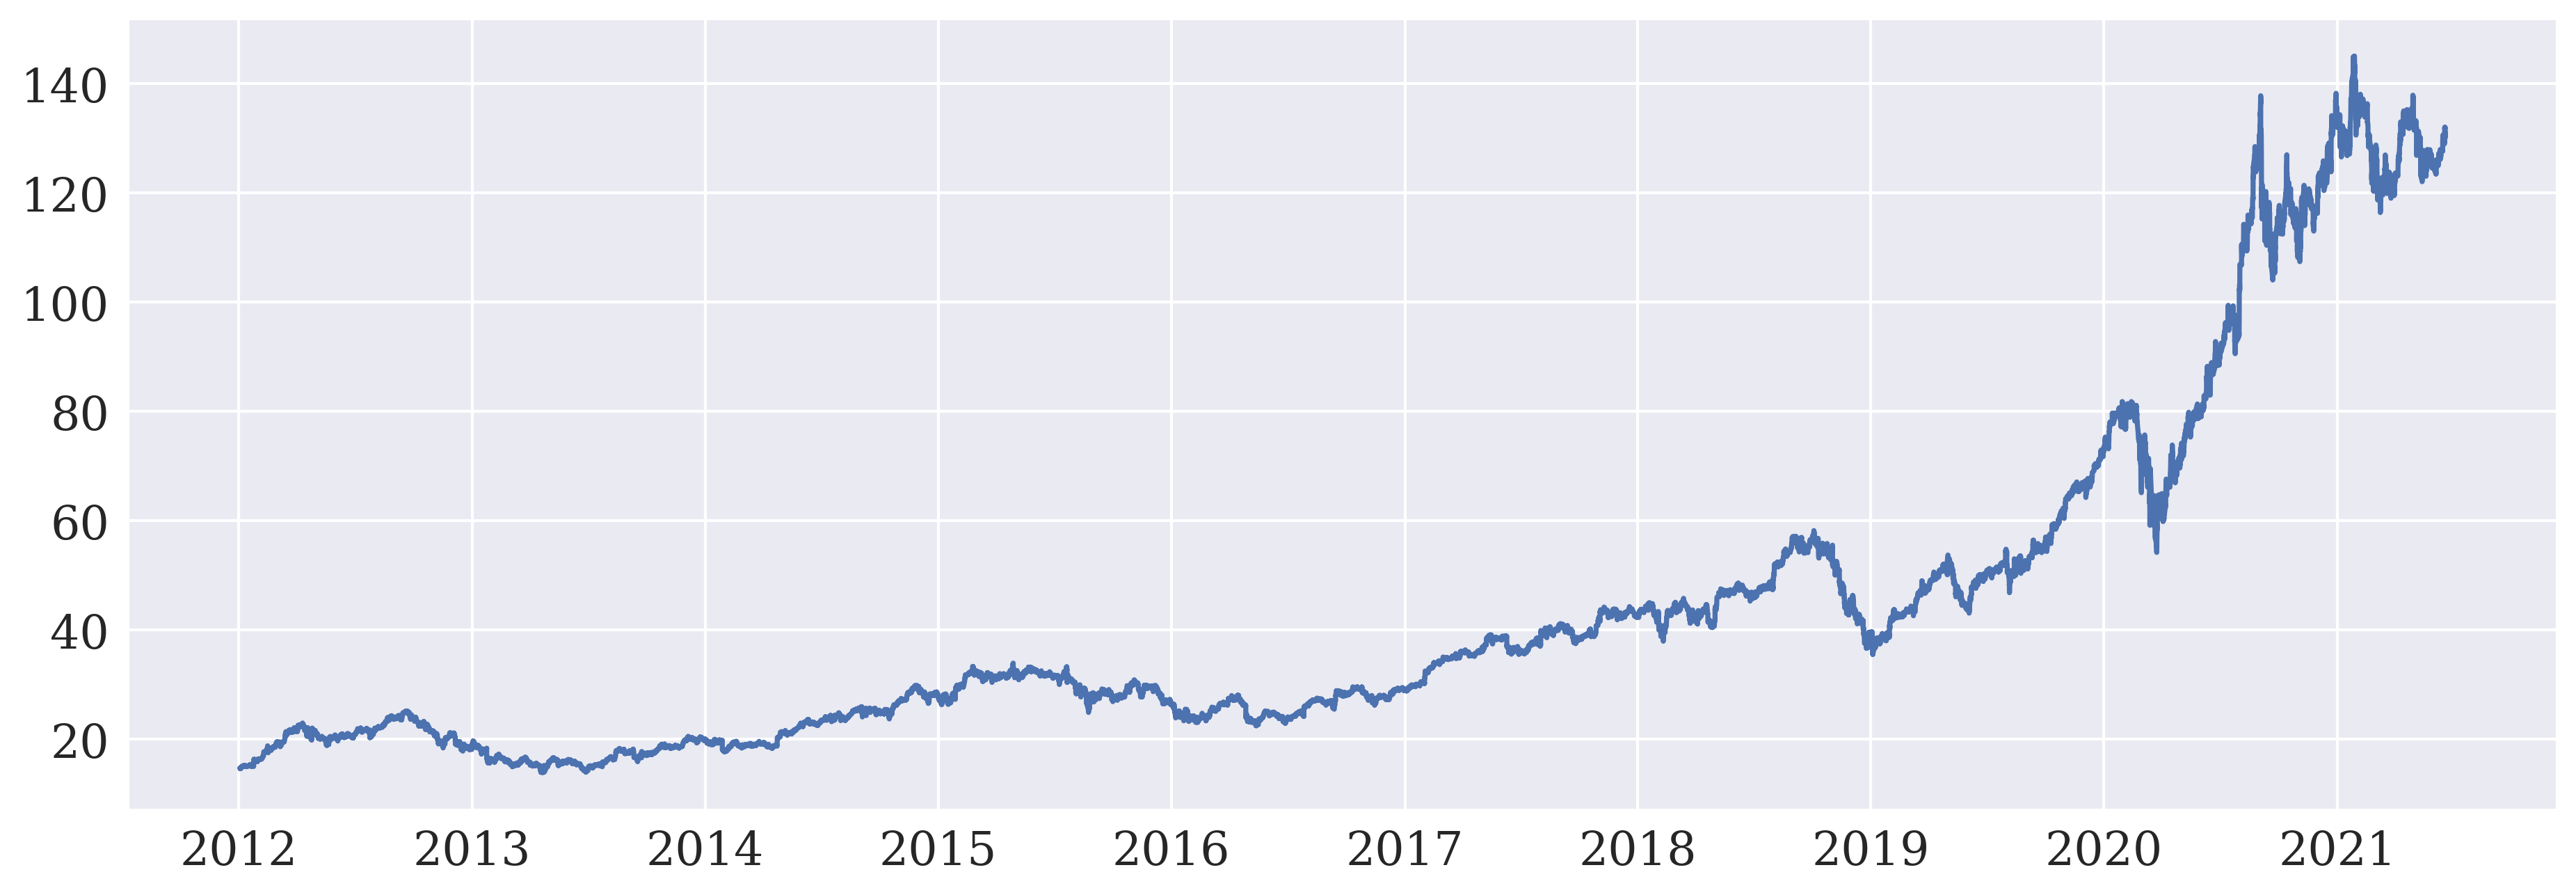

In [14]:
data_stock, barriers, bunch_of_features = get_data_with_labels("AAPL")

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(90, 40))

axs.hist(data['date'], bins=data['date'].describe()['unique'])

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  2.,  2.,  6., 16.,  5., 12., 10., 13.,  4.,  2.,
        15.,  7.,  5.,  5.,  4.,  1.,  2.,  3.,  8.,  9.,  4.,  5.,  2.,
         2.,  8.,  7., 12.,  5.,  6.,  6.,  2.,  3.,  4.,  2.,  4.,  6.,
         1.,  2.,  3.,  5.,  4.,  7.,  6.,  5.,  6., 14., 13., 13., 13.,
         8.,  4.,  5., 13.,  9., 10., 11.,  7.,  2.,  3.]),
 array([ 0.        ,  0.98666667,  1.97333333,  2.96      ,  3.94666667,
         4.93333333,  5.92      ,  6.90666667,  7.89333333,  8.88      ,
         9.86666667, 10.85333333, 11.84      , 12.82666667, 13.81333333,
        14.8       , 15.78666667, 16.77333333, 17.76      , 18.74666667,
        19.73333333, 20.72      , 21.70666667, 22.69333333, 23.68      ,
        24.66666667, 25.65333333, 26.64      , 27.62666667, 28.61333333,
        29.6       , 30.58666667, 31.57333333, 32.56      , 33.54666667,
        34.53333333, 35.52      , 36.50666667, 37.49333333, 38.4

(array([13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([0.        , 0.09333333, 0.18666667, 0.28      , 0.37333333,
        0.46666667, 0.56      , 0.65333333, 0.74666667, 0.84      ,
        0.93333333, 1.02666667, 1.12      , 1.21333333, 1.30666667,
        1.4       , 1.49333333, 1.58666667, 1.68      , 1.77333333,
        1.86666667, 1.96      , 2.05333333, 2.14666667, 2.24      ,
        2.33333333, 2.42666667, 2.52      , 2.61333333, 2.70666667,
        2.8       , 2.89333333, 2.98666667, 3.08      , 3.17333333,
        3.26666667, 3.36      , 3.45333333, 3.54666667, 3.64      ,
        3.73333333, 3.82666667,

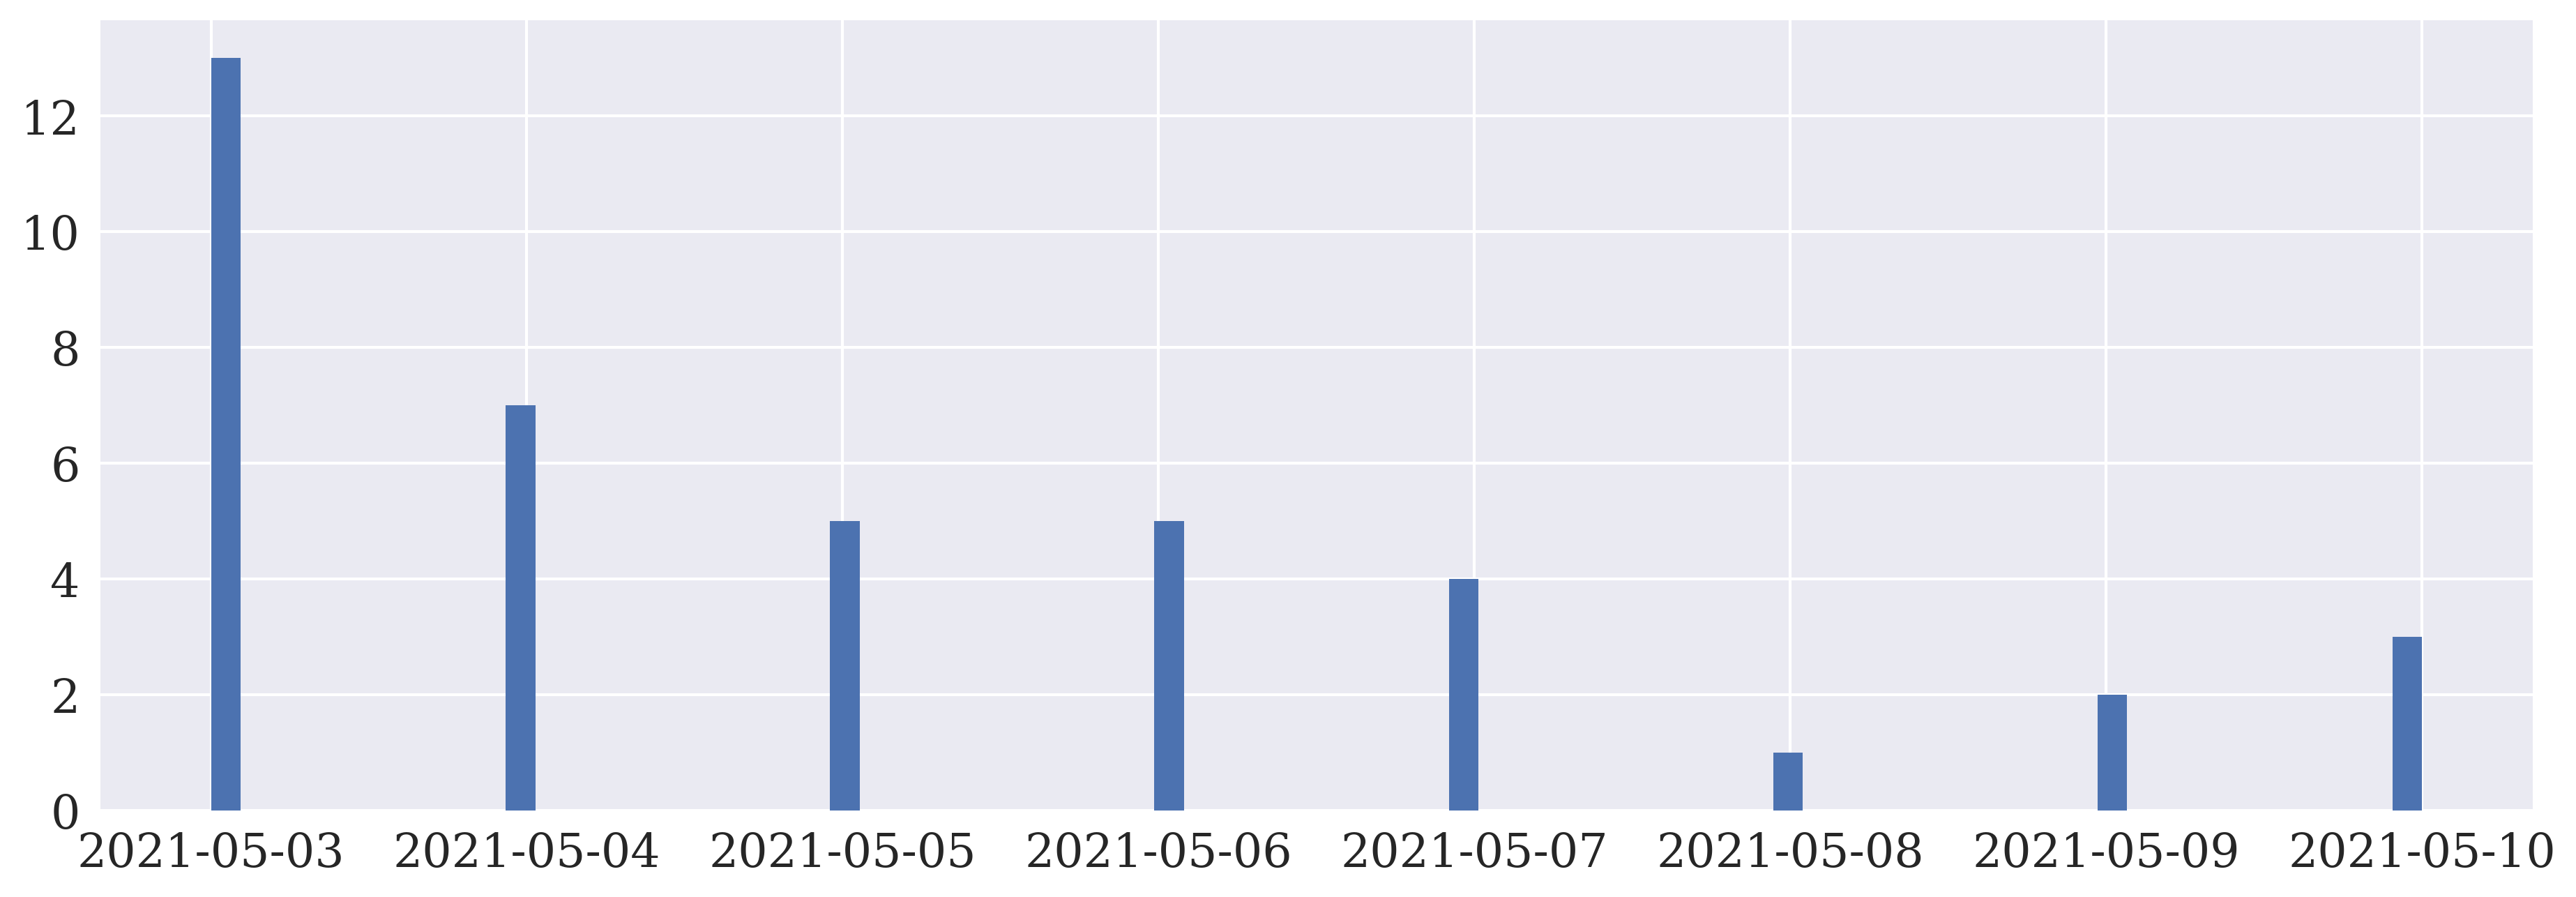

In [43]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

axs.hist(data['date'][90:130], bins=data['date'].describe()['unique'])

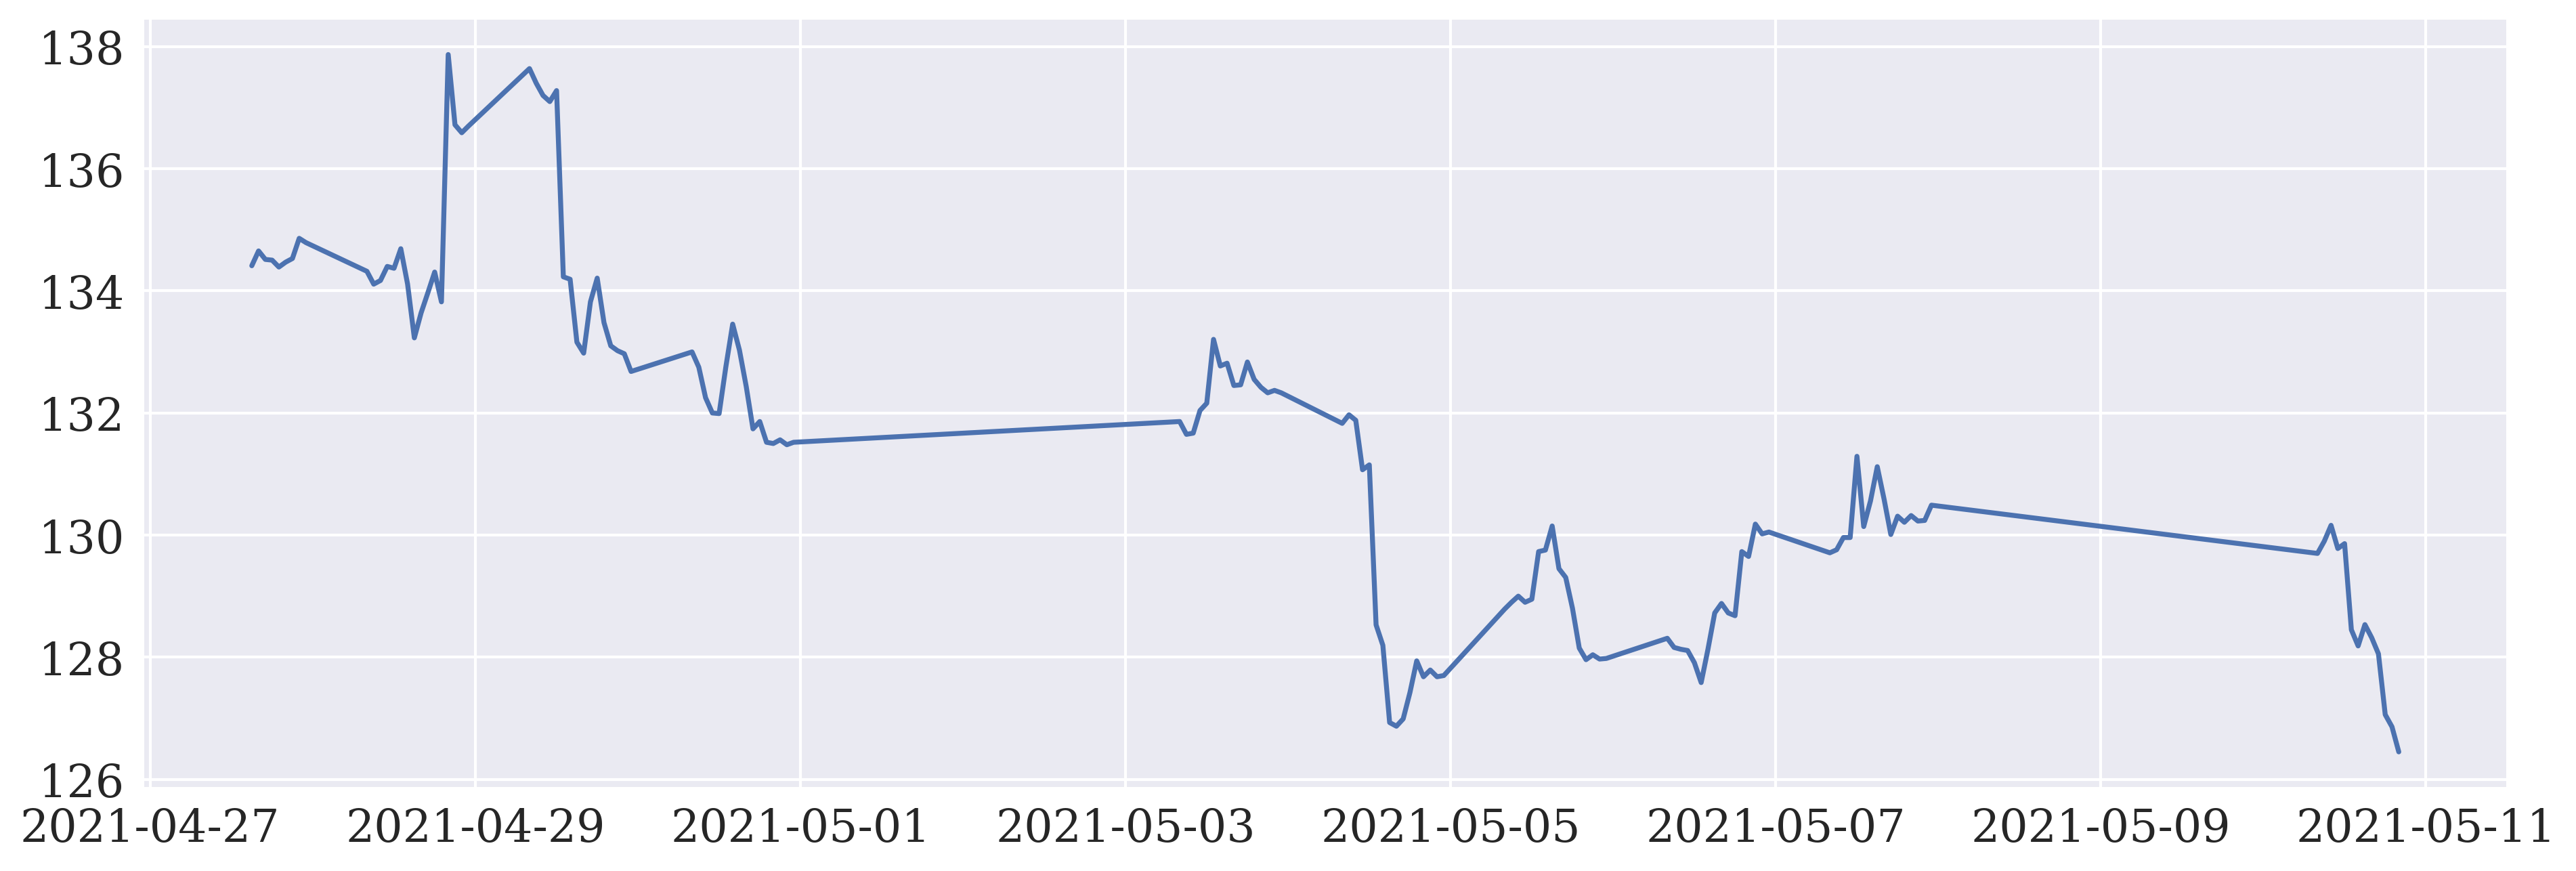

In [46]:
plt.figure(figsize=(15, 5))
plt.plot(data_stock.index[-600:-450], data_stock['close'][-600:-450])
plt.grid(True)

In [20]:
data.to_excel('/Users/germanignatovich/Desktop/work/Диплом/excel/APPLE_NEWS.xlsx')
